>>> INICIANDO ANÁLISE OTIMIZADA (BAIXO CONSUMO DE RAM) <<<
✅ Arquivo encontrado!
📊 Total de Linhas no disco: 4326968
📊 Total de Grupos de Linhas: 5

⏳ Carregando amostra segura para análise...
✅ Amostra carregada na memória: 1048576 linhas

🔍 DISTRIBUIÇÃO DAS CLASSES (NA AMOSTRA):
Label
DrDoS_NetBIOS                   345475
DrDoS_SSDP                      261059
BENIGN                          229302
DrDoS_NTP                       120264
UDP-lag                          36644
DoS Hulk                         23051
PortScan                         15889
DDoS                             12917
DoS GoldenEye                     1002
FTP-Patator                        799
SSH-Patator                        599
DoS slowloris                      558
DoS Slowhttptest                   555
Bot                                181
Web Attack ï¿½ Brute Force         166
Web Attack ï¿½ XSS                  66
WebDDoS                             40
Infiltration                         4
Web Attack

C:\Users\dir_g\AppData\Local\Temp\ipykernel_20308\2830796979.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem.values, y=contagem.index, palette="viridis")


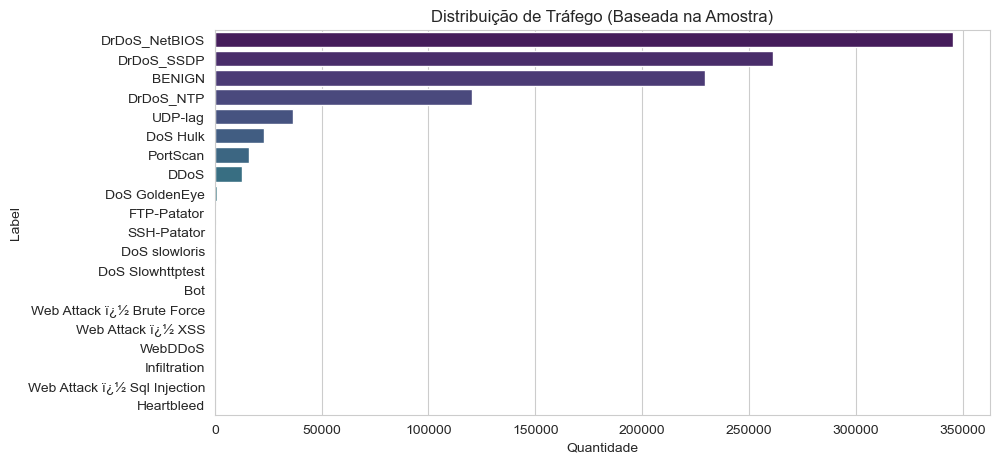


🧹 AUDITORIA DE SUJEIRA:
 - Valores NULOS (NaN): 2268294
 - Valores INFINITOS: 35614

⚠️ ALERTA: Encontramos valores infinitos! O XGBoost não aceita isso.
   (Vamos tratar isso no próximo passo, substituindo pelo valor máximo aceitável)

🏁 Análise concluída. Memória liberada.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import gc # Garbage Collector para limpar RAM

# Configurações visuais
sns.set_style("whitegrid")

# Caminho do arquivo
ARQUIVO_TREINO = r"E:\Estudos_Cybersecurity\Datasets_Cybersecurity\dataset_treino_final.parquet"

print(">>> INICIANDO ANÁLISE OTIMIZADA (BAIXO CONSUMO DE RAM) <<<")

try:
    # 1. INSPEÇÃO DE METADADOS (Sem carregar os dados)
    # Isso lê apenas o cabeçalho do arquivo, gasta quase zero RAM
    arquivo_parquet = pq.ParquetFile(ARQUIVO_TREINO)
    print(f"✅ Arquivo encontrado!")
    print(f"📊 Total de Linhas no disco: {arquivo_parquet.metadata.num_rows}")
    print(f"📊 Total de Grupos de Linhas: {arquivo_parquet.num_row_groups}")
    
    # 2. CARREGAMENTO PARCIAL (Apenas o primeiro grupo de linhas)
    # Isso deve carregar cerca de 100k a 500k linhas, o que é seguro para sua RAM
    print("\n⏳ Carregando amostra segura para análise...")
    
    # Lê apenas o primeiro "row group"
    df_amostra = arquivo_parquet.read_row_group(0).to_pandas()
    
    print(f"✅ Amostra carregada na memória: {df_amostra.shape[0]} linhas")
    
except Exception as e:
    print(f"❌ Erro crítico ao ler o arquivo: {e}")
    # Se der erro aqui, paramos tudo
    exit()

# =============================================================================
# 3. VERIFICAÇÃO DE CLASSES (Na Amostra)
# =============================================================================
print("\n🔍 DISTRIBUIÇÃO DAS CLASSES (NA AMOSTRA):")
if 'Label' in df_amostra.columns:
    contagem = df_amostra['Label'].value_counts()
    print(contagem)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=contagem.values, y=contagem.index, palette="viridis")
    plt.title("Distribuição de Tráfego (Baseada na Amostra)")
    plt.xlabel("Quantidade")
    plt.show()

# =============================================================================
# 4. CAÇA AOS INFINITOS E NULOS
# =============================================================================
print("\n🧹 AUDITORIA DE SUJEIRA:")

# Nulos
nulos = df_amostra.isnull().sum().sum()
print(f" - Valores NULOS (NaN): {nulos}")

# Infinitos (Apenas em colunas numéricas)
cols_numericas = df_amostra.select_dtypes(include=[np.number]).columns
infinitos = np.isinf(df_amostra[cols_numericas]).sum().sum()

print(f" - Valores INFINITOS: {infinitos}")

if infinitos > 0:
    print("\n⚠️ ALERTA: Encontramos valores infinitos! O XGBoost não aceita isso.")
    print("   (Vamos tratar isso no próximo passo, substituindo pelo valor máximo aceitável)")
else:
    print("\n✅ Nenhum infinito encontrado na amostra.")

# Limpa memória
del df_amostra
gc.collect()
print("\n🏁 Análise concluída. Memória liberada.")